In [0]:
# Import libs
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get data
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"


--2019-08-04 19:15:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2019-08-04 19:15:24 (185 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# Uzip the data 
zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [0]:
# Define custom early stopping callbck \

DESIRED_ACCURACY = 0.999

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > DESIRED_ACCURACY):
            print(f"\nReached {100*DESIRED_ACCURACY}% accuracy: cancelling training!")
            self.model.stop_training = True

    
callback_1 = myCallback()

In [0]:
# Get filenames
happy_files = os.listdir(r'../tmp/h-or-s/happy')
sad_files   = os.listdir(r'../tmp/h-or-s/sad')

Happy 1



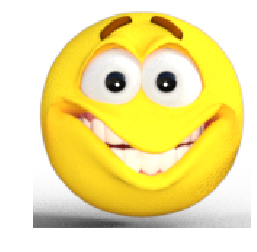


Sad 1



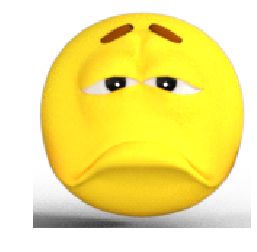

Happy 2



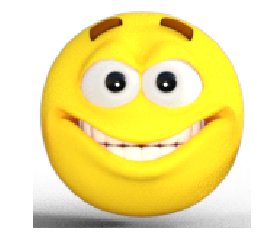


Sad 2



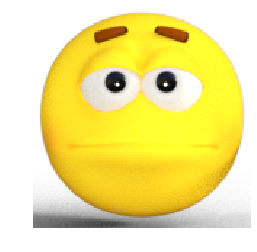

Happy 3



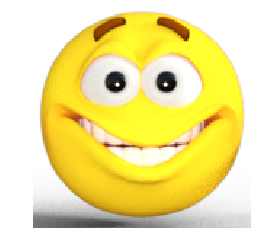


Sad 3



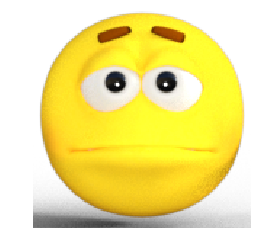

In [7]:
# Examine a few images

for i in range(3):
    
    happy = np.random.choice(happy_files)
    sad   = np.random.choice(sad_files)
    
    happy_pic = plt.imread(os.path.join(r'../tmp/h-or-s/happy', happy))
    sad_pic   = plt.imread(os.path.join(r'../tmp/h-or-s/sad', sad))
    
    print(f'Happy {i + 1}\n')
    plt.imshow(happy_pic)
    plt.axis('off')
    plt.show()
    
    print(f'\nSad {i + 1}\n')
    plt.imshow(sad_pic)
    plt.axis('off')
    plt.show()

In [9]:
happy_pic.shape

(150, 150, 4)

In [14]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])



model.compile(optimizer = RMSprop(lr = .001), 
              loss      = 'binary_crossentropy',
              metrics   = ['acc'])

W0804 19:22:09.697497 140310548252544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(r'../tmp/h-or-s/',
                                                    target_size = (150, 150),
                                                    batch_size  = 128,
                                                    class_mode  = 'binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [21]:
# Fit the model
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 16,
                              epochs          = 15,
                              verbose         = 1,
                              callbacks       = [callback_1])

Epoch 1/15
15/16 [===========================>..] - ETA: 0s - loss: 1.0217e-05 - acc: 1.0000
Reached 99.9% accuracy: cancelling training!
16/16 [==============================] - 3s 200ms/step - loss: 1.0182e-05 - acc: 1.0000
